In [ ]:
#Este programa é utilizado para o desenvolvimento do trabalho prático da disciplina FAM do bootcamp de MLE

In [2]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos

print('bibliotecas')


bibliotecas


In [3]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [4]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
dataframe_bikes= pd.read_csv(nome_do_arquivo)

In [6]:
#apresentando as 5 primeiras linhas do dataset
dataframe_bikes.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17376,17377.0,NaN,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


In [8]:
### verificando quantas linhas/colunas

dataframe_bikes.shape

(17379, 17)

# **Pergunta 1 No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?**

( ) (15,1345).

( ) (1345,15).

( ) (17,17379).

(X) (17379,17).

In [10]:
dataframe_bikes.shape

(17379, 17)

In [11]:
### verificando quais tipos de dados existem no arquivo, sem contudo listar todas as colunas!!! -> dtypes: float64(16), object(1)
dataframe_bikes.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Columns: 17 entries, instant to cnt
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


# **Pergunta 2 Quantos tipos diferentes de dados existem no dataset do desafio?**

(X) 2.

( ) 3.

( ) 17.

( ) 12.

In [12]:
dataframe_bikes.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


# **Pergunta 3 Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?**

(X) 10%.

( ) 5%.

( ) 15%.

( ) 0%.

In [13]:
### verificando dados nulos na coluna temp
100 * (dataframe_bikes["temp"].isnull().sum(axis = 0) / dataframe_bikes.shape[0])

10.000575407100524

# **Pergunta 4 Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?**

(X) (15641,17).

( ) (17,17379).

( ) (17379,17).

( ) (17,15641).

In [14]:
# removendo registros com dados nulos na coluna dteday
dataframe_bikes.dropna(subset = ["dteday"], inplace=True)
dataframe_bikes = dataframe_bikes.reset_index(drop=True)

#verificando estrutura após remoção
dataframe_bikes.shape

(15641, 17)

In [16]:
### verificando o resultado
dataframe_bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
1,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
2,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
3,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
4,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0


# **Pergunta 5 Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?**

( ) 0,192.

(X) 0,496.

( ) 1,192.

( ) 0,156.

In [ ]:
#analisando a "estatística" do dataset
dataframe_bikes["temp"].describe()

count    14066.000000
mean         0.496926
std          0.192971
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

# **Pergunta 6 Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?**

( ) 1,122.

( ) 0,189.

( ) 0,192.

(X) 0,122.

In [ ]:
#analisando a "estatística" do dataset
dataframe_bikes["windspeed"].describe()

count    14082.000000
mean         0.189552
std          0.122309
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

# **Pergunta 7 Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?**

(X) 4.

( ) 1.

( ) 2.

( ) 3.

In [17]:
# alterando tipo de dados da coluna season
dataframe_bikes[["season"]] = dataframe_bikes["season"].astype(str)

# valores unicos da coluna season
dataframe_bikes["season"].unique()

array(['1.0', 'nan', '2.0', '3.0', '4.0'], dtype=object)

# **Pergunta 8 Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?**

(X) 2012-12-31.

( ) 2012-01-31.

( ) 2012-01-31.

( ) 2014-12-31.

In [ ]:
# convertendo a colunan dteday
dataframe_bikes[["dteday"]] = pd.to_datetime(dataframe_bikes['dteday'], format='%Y-%m-%d')

# pegando a ultima data
dataframe_bikes["dteday"].tail()

15636   2012-12-31
15637   2012-12-31
15638   2012-12-31
15639   2012-12-31
15640   2012-12-31
Name: dteday, dtype: datetime64[ns]

# **Pergunta 9 Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerando o boxplot da variável "windspeed" (velocidade do vento), é CORRETO afirmar:**

( ) Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.

(X) Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

( ) Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

( ) Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.

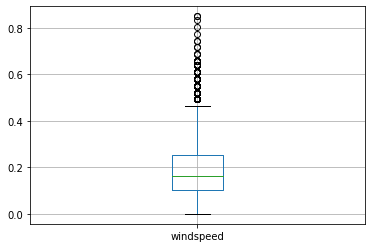

In [18]:
#identificando possíveis outliers
dataframe_bikes[['windspeed']].boxplot()

# **Pergunta 10 Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt", é CORRETO afirmar:**

(X) Possuem baixa correlação linear negativa.

( ) Possuem baixa correlação linear positiva.

( ) Possuem alta correlação linear positiva.

( ) Possuem alta correlação linear negativa.

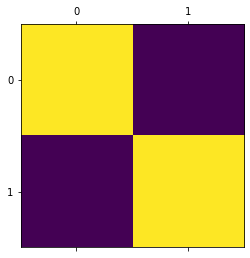

,hum,cnt
hum,1.000000,-0.323409
cnt,-0.323409,1.000000


In [19]:
plt.matshow(dataframe_bikes[[ "hum", "cnt"]].corr())
plt.show()
dataframe_bikes[[ "hum", "cnt"]].corr()

# **Pergunta 11 Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.**

( ) -0.80.

(X) 0.40.

( ) 0.80.

( ) -0.40.

In [43]:
# substituindo pela media
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(dataframe_bikes[["hum","cnt","casual"]])
dataframe_bikes[["hum","cnt","casual"]] = imputer.transform(dataframe_bikes[["hum","cnt","casual"]])

In [45]:
# confirmando que nao existe mais NAN
dataframe_bikes[["hum","cnt","casual"]].isna().sum()

hum       0
cnt       0
casual    0
dtype: int64

In [46]:
#realizando a análise de regressão
x=dataframe_bikes[["hum","casual"]].values  #variável independente 
Y=dataframe_bikes["cnt"].values #variável dependente 

In [47]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [48]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
#x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao= reg.fit (x,Y) # encontra os coeficientes (realiza a regressão)

In [53]:
#realiza a previsão
previsao=reg.predict(x)

In [50]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [51]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_[0],reg.intercept_))

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = -99.7501232790834X 173.2933750513559
Coeficiente de Determinação (R2): 0.4059859251122173


# **Pergunta 12 Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique Árvore de Decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".**

( ) 1,00.

( ) 0,40.

( ) 0,30.

(X) 0,70.

In [54]:
from sklearn.tree import DecisionTreeRegressor  
# A árvore de decisão
regressor = DecisionTreeRegressor(random_state = 0)
# Treinando a árvore de decisao
c = regressor.fit(x, Y)

In [55]:
#realiza a previsão
previsao=regressor.predict(x)

In [56]:
R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.7098339715834964


# **Pergunta 13 Comparando os valores de R2 encontrado com a regressão linear e com a Árvore de Decisão, é CORRETO afirmar:**

( ) O valor encontrado pela Árvore de Decisão foi negativo.

(X) Os valores encontrados pela Árvore de Decisão como regressor e a regressão linear são próximos.

(X) O valor obtido pela Árvore de Decisão como regressor apresenta maior R2.

(X) O valor encontrado pela regressão linear é superior ao encontrado pela Árvore de Decisão.

# **Pergunta 14 Comparando o SVM com a Árvore de Decisão é CORRETO afirmar:**


( ) Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes.

(X) SVM encontra o hiperplano que gera a maior separação entre os dados.

( ) SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação.

( ) Árvore de Decisão encontra os hiperplanos de separação do mesmo modo que o SVM.

In [40]:
from sklearn.svm import SVR
# Classificador SVM
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
previsao = svr_rbf.fit(x, Y).predict(x)
R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.4518021233743311


In [41]:
#svr_lin = SVR(kernel='linear', C=100, gamma='auto')
#previsao = svr_lin.fit(x, Y).predict(x)
#R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
#print("Coeficiente de Determinação (R2):", R_2)

In [42]:
#svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
#               coef0=1)
#previsao = svr_poly.fit(x, Y).predict(x)
#R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
#print("Coeficiente de Determinação (R2):", R_2)

# **Pergunta 15 Com base na Árvore de Decisão é CORRETO afirmar:**

(X) Pode ser utilizada para classificação e regressão.

( ) Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação realizada através da Árvore de Decisão.

( ) A análise de regressão com a Árvore de Decisão só pode ser realizada com valores categóricos.

( ) Ávore de Decisão é utilizada apenas para a classificação de dados contínuos.